Analysis on Populous Airports by Passenger Traffic and Prediction of Top 5 Busiest Airports based on Webscrapped Data.

Fetching data from Wikipedia:

Data is webscrapped from https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic. The big picture about this data is, it contains year wise list of top 50 airports across the globe based on passenger traffic and the percent change in passenger traffic as compared to the previous year, from year 2000 to year 2016.

This project incorporates the following steps:
1. Fecth data from website.
2. Extract the required tables.
3. Create a dictionary of airports with country, yearwise passenger traffic and year wise passenger traffic percentage change.
4. Convert the dictionary to dataframe
5. Save the extracted data as HTML and CSV files.
6. Analysis and plot of most populous airports globally and the growth pattern.
7. Analysis and plot of most populous airports in United States of America and the growth pattern.
8. Predictive Analysis on passenger traffic growth pattern to indentify the top 5 busiest airports.

In [91]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import requests
import numpy as np
from pattern import web
import seaborn as sns

Fetch data from Wikipedia and extract required tables

In [92]:
url = 'https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic'
website_html = requests.get(url).text
print website_html

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>List of busiest airports by passenger traffic - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_busiest_airports_by_passenger_traffic","wgTitle":"List of busiest airports by passenger traffic","wgCurRevisionId":767566268,"wgRevisionId":767566268,"wgArticleId":1967116,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 uses Chinese-language script (zh)","CS1 uses Japanese-language script (ja)","Pages with URL errors","Wikipedia pages semi-protected from banned users","Lists of busiest airports"],"wgBreakFrames":false,"wgPageContentLanguage":"

In [93]:
dom = web.Element(website_html)
tables = dom.by_class('wikitable sortable')

In [94]:
result = defaultdict(dict)
count = 0
year = 2016

Create a dictionary from the extracted tables

In [95]:
for tbl in tables:
    
    count += 1
    if count < 11:
        
        headers = tbl('tr')
        first_header = headers[0]
        th_s = first_header('th')
        
        #Fetch the country header
        attribute_country = [str("00") + str(th_s[3].content)]
        country_index = 3
        
        #Fetch the total passenger and percent change header
        attribute_parameters = [str(year) + " " + str(th_s[5].content).replace("<br />"," ").replace("\n",""), str(year) + " " + str(th_s[7].content).replace("<br />"," ").replace("\n","")]
        parameters_index = [5,7]
        
        rows = tbl('tr')[1:]
        for i in range(0,len(rows)):
            
            row = rows[i]
            tds = row('td')
            
            #Fetch the airport name
            airport_name = tds[1]('a')[1].content
            
            #Add the airport to the dictionary
            if airport_name not in result:  
                airport_country = [tds[country_index].content]
                subdict = dict(zip(attribute_country,airport_country))
                result[airport_name].update(subdict)
                
            #Fetch the total passenger traffic and passenger traffic percent change
            airport_parameters = []
            for colindex in parameters_index:
                if colindex == 5:   
                    if tds[colindex].content.find("<") == -1:
                        airport_parameters.append(int(tds[colindex].content.replace(",","")))
                    else:
                        airport_parameters.append(int(tds[colindex].content[0:tds[colindex].content.find("<")].replace(",","")))
                if colindex == 7:
                    try:
                        if tds[colindex].content.find("Decrease") > -1:                
                            airport_parameters.append(float(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%",""))*-1)
                        else:
                            airport_parameters.append(float(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%","")))
                    except:
                        airport_parameters.append(tds[colindex].content[tds[colindex].content.rfind(">")+1:].replace("%",""))
            
            #Add the total passenger traffic and passenger traffic percent change to the dictionary
            subdict = dict(zip(attribute_parameters, airport_parameters))           
            result[airport_name].update(subdict)
        year = year - 1
        
print result

defaultdict(<type 'dict'>, {u'Newark Liberty International Airport': {'2008 Total passengers': 35360848, '2010 % Change': u'', '2011 % Change ': 1.3, '2009 Total passengers': 33399207, '00Country': u'United States', '2012 Total passengers': 33993962, '2010 Total passengers': 33133852, '2015 Total passengers': 37494704, '2016 Total passengers': 40351331, '2016 % Change': 7.6, '2008 % Change': -2.8, '2014 % Change': 1.7, '2015 % Change': 5.3, '2007 % Change': 2.1, '2011 Total passengers': 33577154, '2009 % Change': -5.5, '2013 Total passengers': 35016236, '2014 Total passengers': 35610759, '2013 % Change': 3.0, '2012 % Change ': 0.9, '2007 Total passengers': 36367240}, u'Toronto Pearson International Airport': {'2008 Total passengers': 32338902, '2010 % Change': u'', '2011 % Change ': 4.5, '2009 Total passengers': 30368339, '00Country': u'Canada', '2012 Total passengers': 34912456, '2010 Total passengers': 31937895, '2015 Total passengers': 41036847, '2016 Total passengers': 44335198, '2

Convert the dictionary to dataframe

In [96]:
df = pd.DataFrame.from_dict(result, orient='index')
df.sort_index(axis=1,inplace=True)

Export the dataframe as HTML file

In [97]:
outfile = open("C:/Ramu Valliappan/GSU/MSIS/Courses/Data Programming/Project/dataset.html", "w")
outfile.seek(0)
outfile.truncate()
outfile.write(df.to_html().encode("utf-8"))
outfile.close() 

IOError: [Errno 2] No such file or directory: 'C:/Ramu Valliappan/GSU/MSIS/Courses/Data Programming/Project/dataset.html'

Export the data as CSV file

In [ ]:
df.to_csv("C:/Ramu Valliappan/GSU/MSIS/Courses/Data Programming/Project/Results.csv",  encoding='utf-8')

Create a sub dataframe for year wise passenger traffic

In [98]:
countryPassengerTraffic = ['00Country','2007 Total passengers','2008 Total passengers','2009 Total passengers','2010 Total passengers','2011 Total passengers','2012 Total passengers','2013 Total passengers','2014 Total passengers','2015 Total passengers','2016 Total passengers']
countryPassengerTraffic_df = pd.DataFrame(df,columns=countryPassengerTraffic)

In [99]:
passengerTraffic = ['2007 Total passengers','2008 Total passengers','2009 Total passengers','2010 Total passengers','2011 Total passengers','2012 Total passengers','2013 Total passengers','2014 Total passengers','2015 Total passengers','2016 Total passengers']
passengerTraffic_df = pd.DataFrame(countryPassengerTraffic_df,columns=passengerTraffic)
passengerTraffic_df.columns = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

Analysis - Worldwide passenger traffic and growth pattern

In [100]:
iSum = 0
iCount = 0
lresult= []

#Create a new index on column to store the total passenger traffic for all the years
countryPassengerTraffic_df["Total Passengers"] = 0

for index, row in countryPassengerTraffic_df.iterrows():
    for iRow in range(1, len(countryPassengerTraffic)):
        if (pd.notnull(row[iRow])):
            iSum += row[iRow]
    lresult.append(iSum)
    iSum = 0
    iCount = 0
    
countryPassengerTraffic_df["Total Passengers"] = np.asarray(lresult)

In [101]:
topFiveCountryPassengerTraffic_df = countryPassengerTraffic_df.sort_values(["Total Passengers"], ascending = [False]).head(5)

Plot - Most populous airports based on passenger traffic - Worldwide

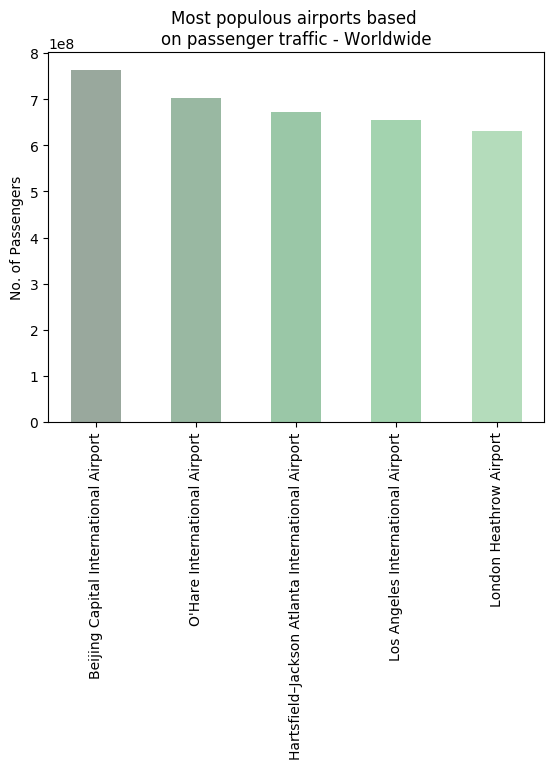

In [102]:
objects = list(topFiveCountryPassengerTraffic_df.index)
y_pos = np.arange(len(objects))
performance = topFiveCountryPassengerTraffic_df["Total Passengers"].tolist()

plt.bar(y_pos, performance, align='center', alpha=0.5, width = 0.5, color = sns.color_palette("Greens_d"))
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('No. of Passengers')
plt.title('Most populous airports based \non passenger traffic - Worldwide')

plt.show()

Plot - Passenger traffic growth pattern - Worldwide

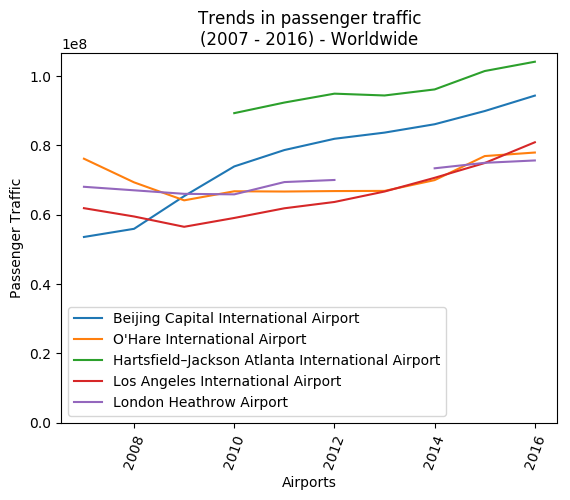

In [103]:
airportNamesWorldwide = list(topFiveCountryPassengerTraffic_df.index)

for airport in airportNamesWorldwide:
    row = passengerTraffic_df.ix[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Trends in passenger traffic\n(2007 - 2016) - Worldwide")

plt.show()

Analysis - USA passenger traffic and growth pattern

In [ ]:
USAPassengerTraffic_df = countryPassengerTraffic_df.loc[countryPassengerTraffic_df["00Country"] == "United States"]

USAPassengerTraffic_df = USAPassengerTraffic_df.sort_values(["Total Passengers"], ascending = [False]).head(5)

Plot - Most populous airports based on passenger traffic - USA

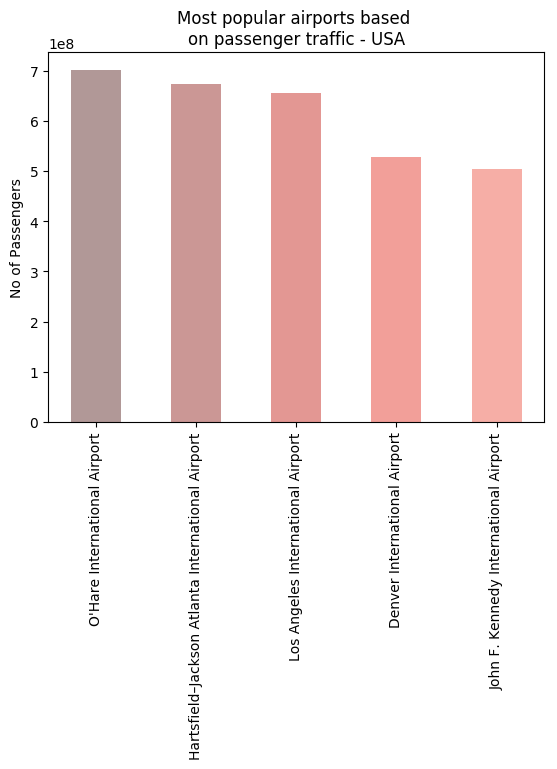

In [106]:
objects = list(USAPassengerTraffic_df.index)
y_pos = np.arange(len(objects))
performance = USAPassengerTraffic_df["Total Passengers"].tolist()


plt.bar(y_pos, performance, align='center', alpha=0.5, width = 0.5, color = sns.color_palette("Reds_d"))
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('No of Passengers')
plt.title('Most popular airports based \non passenger traffic - USA')

plt.show()

Plot - Passenger traffic growth pattern - Worldwide

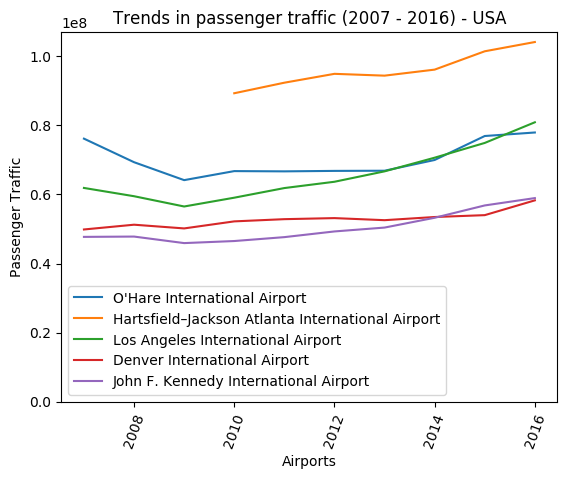

In [105]:
airportNamesUSA = list(USAPassengerTraffic_df.index)

for airport in airportNamesUSA:
    row = passengerTraffic_df.ix[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Trends in passenger traffic (2007 - 2016) - USA")

plt.show()

Predictive Analysis on passenger traffic growth pattern to indentify the top 5 busiest airports

In [74]:
countryPassengerTraffic = ['00Country','2007 Total passengers','2008 Total passengers','2009 Total passengers','2010 Total passengers','2011 Total passengers','2012 Total passengers','2013 Total passengers','2014 Total passengers','2015 Total passengers','2016 Total passengers']
countryPassengerTraffic_df = pd.DataFrame(df,columns=countryPassengerTraffic)

In [75]:
passengerTrafficPercentage =['2007 % Change','2008 % Change','2009 % Change','2010 % Change','2011 % Change','2012 % Change','2013 % Change','2014 % Change','2015 % Change','2016 % Change']
passengerTrafficPercentage_df = pd.DataFrame(df,columns=passengerTrafficPercentage)

In [76]:
iSum = 0
iCount = 0
lresult= []

for index, row in passengerTrafficPercentage_df.iterrows():
    for iRow in range(0, len(passengerTrafficPercentage)):
        if (pd.notnull(row[iRow]) and row[iRow]!=""):
            iSum = iSum + row[iRow]
            iCount += 1
    if iSum != 0 and iCount != 0:
        value = iSum / iCount
    lresult.append(value)
    iSum = 0
    iCount = 0

countryPassengerTraffic_df["Total % change"] = np.asarray(lresult)

Prediction Logic

In [77]:
for i in range (2017,2022):
    futureYear = i
    currentYear = i-1
    futureIndex = str(futureYear) + " Total passengers"
    currentIndex = str(currentYear) + " Total passengers"
    val = []
    countryPassengerTraffic_df = countryPassengerTraffic_df[countryPassengerTraffic_df[currentIndex].notnull()]
    countryPassengerTraffic_df[futureIndex] = 0
    for row in countryPassengerTraffic_df[currentIndex]:
        if (pd.notnull(row)):
            value = (row * (1+ (countryPassengerTraffic_df['Total % change']/100)))
        val.append(value)
    countryPassengerTraffic_df[futureIndex] = np.asarray(val) 

Top 5 Airports by 2021 - Worldwide

In [78]:
topFive2020CountryPassengerTraffic_df = countryPassengerTraffic_df.sort_values(["2021 Total passengers"], ascending = [False]).head(5)

futurePassengerTraffic = ['2017 Total passengers','2018 Total passengers','2019 Total passengers','2020 Total passengers','2021 Total passengers']
futurePassengerTraffic_df = pd.DataFrame(countryPassengerTraffic_df,columns=futurePassengerTraffic)
futurePassengerTraffic_df.columns = [2017, 2018, 2019, 2020, 2021]

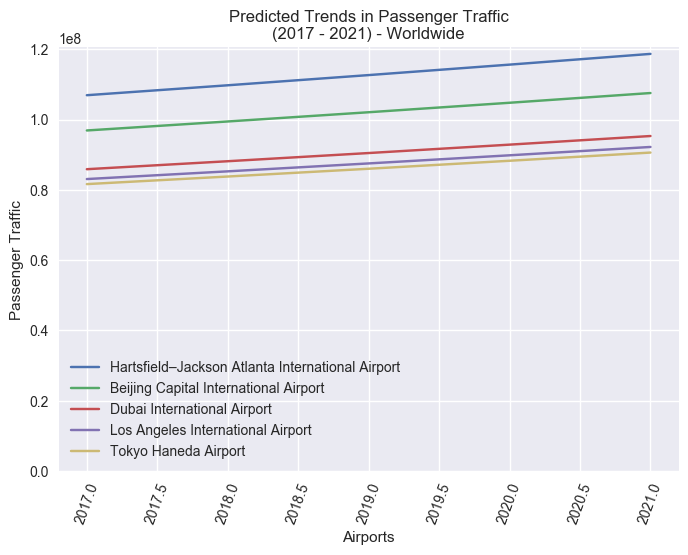

In [86]:
airportNamesWorldwide = list(topFive2020CountryPassengerTraffic_df.index)

for airport in airportNamesWorldwide:
    row = futurePassengerTraffic_df.ix[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Predicted Trends in Passenger Traffic\n(2017 - 2021) - Worldwide")

plt.show()

Top 5 Airports by 2021 - USA

In [ ]:
futureUSAPassengerTraffic_df = countryPassengerTraffic_df.loc[countryPassengerTraffic_df["00Country"] == "United States"]

futureUSAPassengerTraffic_df = futureUSAPassengerTraffic_df.sort_values(["2021 Total passengers"], ascending = [False]).head(5)

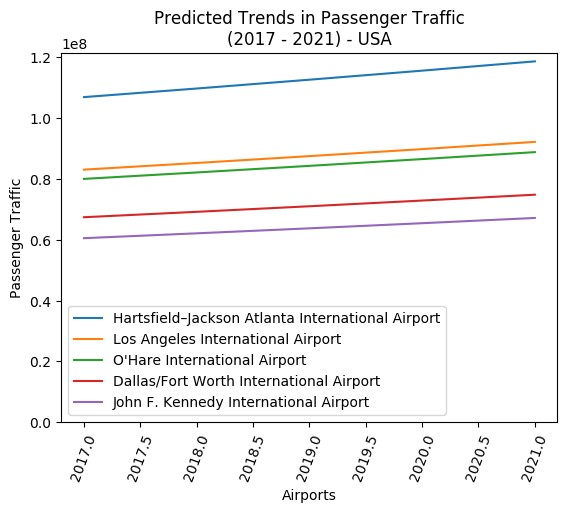

In [104]:
airportNamesUSA = list(futureUSAPassengerTraffic_df.index)

for airport in airportNamesUSA:
    row = futurePassengerTraffic_df.ix[airport]
    plt.plot(row.index, row, label=row.name ) 
    
plt.ylim(ymin=0)
plt.xticks(rotation=70)
plt.legend(loc='best')
plt.xlabel("Airports")
plt.ylabel("Passenger Traffic")
plt.title("Predicted Trends in Passenger Traffic\n(2017 - 2021) - USA")

plt.show()

In [ ]:
Pie Chart

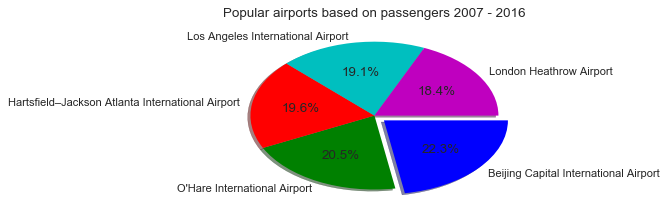

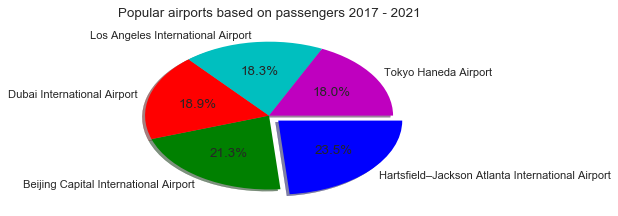

In [90]:
result0 = pd.DataFrame(topFiveCountryPassengerTraffic_df.groupby([topFiveCountryPassengerTraffic_df.index], as_index = True).agg({'Total Passengers':sum}).sort_values(by = 'Total Passengers', ascending=False))[0:5]

result1 = pd.DataFrame(topFive2020CountryPassengerTraffic_df.groupby([topFive2020CountryPassengerTraffic_df.index], as_index = True).agg({'2020 Total passengers':sum}).sort_values(by = '2020 Total passengers', ascending=False))[0:5]

values0 = [float(i) for i in result0["Total Passengers"]]
values1 = [float(i) for i in result1["2020 Total passengers"]]

values=[values0, values1]
colors = ['b', 'g', 'r', 'c', 'm']

labels0 = [str(i) for i in result0.index.str.encode('utf-8')]
labels1 = [str(i) for i in result1.index.str.encode('utf-8')]


labels=[labels0, labels1]
title=['Popular airports based on passengers 2007 - 2016','Popular airports based on passengers 2017 - 2021']

# move the second value section out of the chart. The higher the number the farther it gets moved

explode = (0.1, 0, 0, 0, 0)

for i in range(0,2):

# autopct the %.1f is Python formating and %% used to show as percent
    plt.figure(i)
    fig=plt.figure(figsize=(5, 3), dpi= 80, facecolor='w')
    labels[i] = [x.decode('UTF8') for x in labels[i]]
    plt.pie(values[i], colors=colors, labels=labels[i], 
            explode=explode, autopct='%.1f%%',
            counterclock=False, shadow=True)

    plt.title(title[i])


plt.show()